In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret

In [4]:
x=np.linspace(0,1,10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-3.58690189e+03  1.34932504e+04 -1.92579718e+04  1.18450131e+04
 -1.25598577e+03 -2.10663269e+03  1.05029298e+03 -1.98933610e+02
  1.77115150e+01  1.15008688e-01]


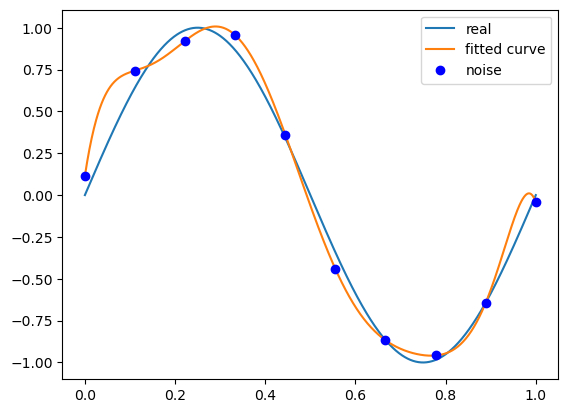

In [12]:
p_lsq_0=fitting(M=9)

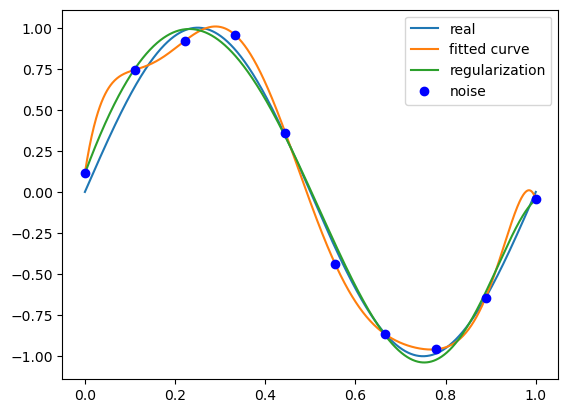

In [14]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))


plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_0[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns=[
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

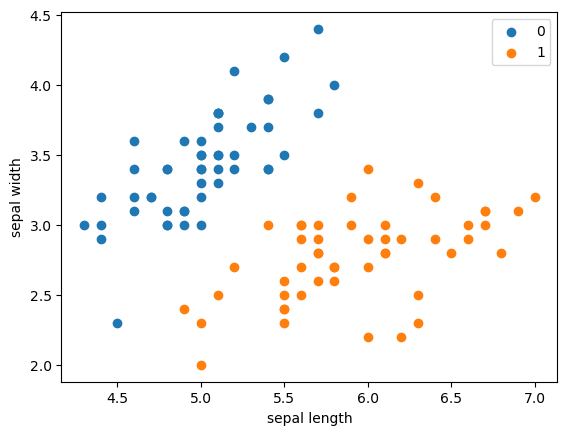

In [16]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [17]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [19]:
class Model:
    def __init__(self):
        self.w=np.ones(len(data[0])-1,dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [20]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

D:\DATA\ipykernel_2968\3404503885.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
D:\DATA\ipykernel_2968\3404503885.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


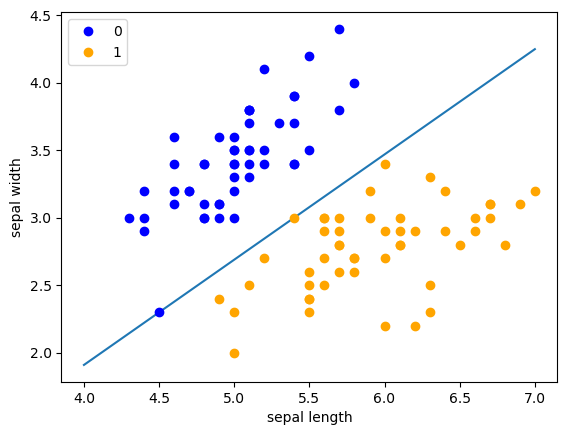

In [21]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [22]:
import sklearn
from sklearn.linear_model import Perceptron

In [23]:
sklearn.__version__

'1.2.2'

In [28]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

Perceptron(tol=None)

In [25]:
print(clf.coef_)

[[ 23.2 -38.7]]


In [26]:
print(clf.intercept_)

[-5.]


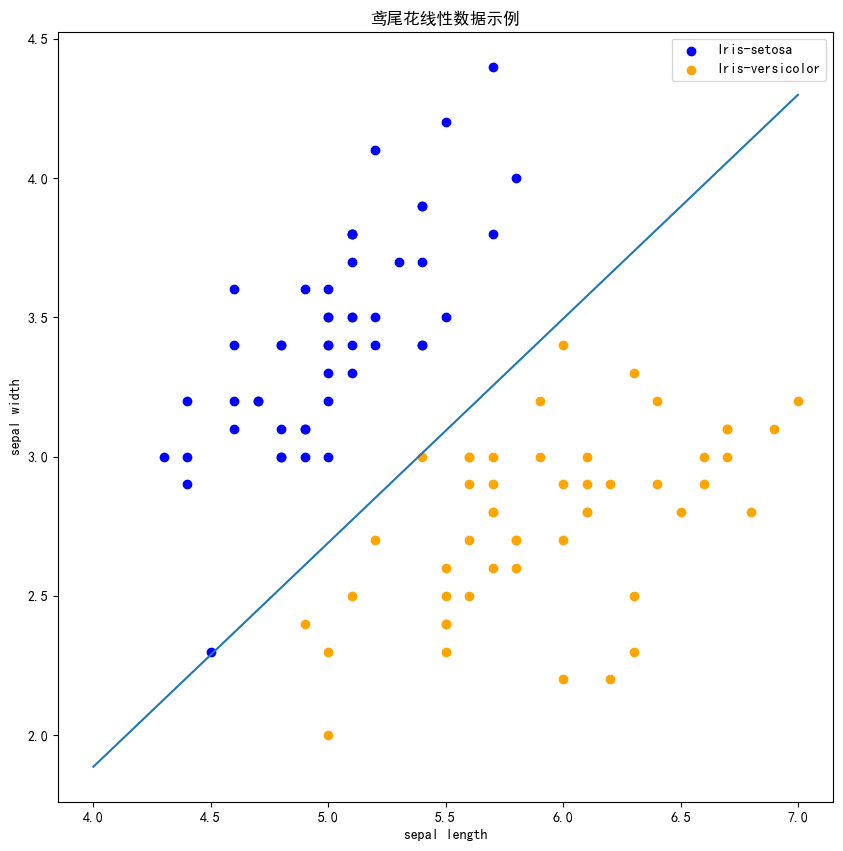

In [29]:
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')
# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)
# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 数分实战b.1

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'                                  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False                                  # 正常显示负号

data1=pd.read_excel('meal_order.xlsx', sheet_name='detail_1')
data2=pd.read_excel('meal_order.xlsx', sheet_name='detail_2')
data3=pd.read_excel('meal_order.xlsx', sheet_name='detail_3')

data = pd.concat([data1,data2,data3], axis=0)
round(data['amounts'].mean(),2)
round(np.mean(data['amounts']),2)

data.plot(kind='line',color=['r','m','b','y','g'])
data.plot(kind='bar',fontsize=16)
for x,y in enumerate(data):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)

plt.title('订单种类')
plt.xlabel('订单id',fontsize=16)

data['ave']=data['totals']/data['counts']
sort_ave=data.sort_values(by='ave',ascending=False)
sort_ave['ave'][:].plot(kind='bar')

data['weekcount']=1
data['weekday']=data['time'].map(lambda x:x.weekday())
gp = data.groupby(by='weekday').count()['weekcount']
gp.plot(kind='bar')

## 数分实战b.2

In [ ]:
data = pd.read_csv('data_wuliu.csv',encoding='gbk')
data.info()

data.drop_duplicates(keep='first', inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data.drop(columns=['订单行'], inplace=True, axis=1)

def dt_deal(number):
    if number.find('万元') != -1:
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else:
        number_new = float(number.replace('元','').replace(',',''))
        pass
    return number_new
data['销售金额'] = data['销售金额'].map(dt_deal)

data.describe

data = data[data['销售金额'] != 0]
data['销售时间']=pd.to_datetime(data['销售时间'])
data['月份']=data['销售时间'].apply(lambda x:x.month)

data['货品交货状态']=data['货品交货状态'].str.strip()
data1 = data.groupby(['月份','货品交货状态']).size().unstack()
data1['按时交货率']=data1['按时交货']/(data1['按时交货']+data1['晚交货'])

data1.sort_values(by='按时交货率', ascending=False)
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1.plot(kind='line')

data1['拒绝率']=data1['拒绝']/data1.sum(axis=1)
data1.sort_values(['合格率','返修率','拒绝率'], ascending=False)

## 数分实战b.3

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt', names=columns, sep='\s+') # 匹配任意个空格
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
df['month'] = df['order_date'].astype('datetime64[M]')
plt.figure(figsize=(20,15))
plt.subplot(221)
df.groupby(by='month')['order_products'].sum().plot() # 默认折线图
df.groupby(by='month')['order_products'].apply(lambda x:len(x.drop_duplicates())).plot()

df.plot(kind='scatter', x='order_products', y='order_amount')
df.groupby(by='user_id')['order_amount'].sum().plot(kind='hist', bins=20)
user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()

user_cumsum['amounts'] = user_cumsum['amounts'].cumsum()
user_cumsum.tail()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amounts']/df, axis=1)

df.groupby(by='user_id')['order_date'].min().value_counts().plot()

rfm = df.pivot_table(index='user_id',                                           # 相当于groupby
                     values=['order_products','order_amount','order_date'],
                     aggfunc={
                         'order_date':'max',
                         'order_products':'sum',
                         'order_amount':'sum'
                     })
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D') # 精度1位小数和单位天数
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)

def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R']+level['F']+level['M']
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        # ......
        '000':'一般挽留客户'
    }
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func, axis=1)
rfm.head()

for label, grouped in rfm.groupby(by='label'):
    print(label, grouped)
    x=grouped['F']
    y=grouped['R']
    plt.scatter(x, y, label=label)
plt.legend()                                                    # 显示图例

pivoted = df.pivot_table(
                        index='user_id',
                        columns='month',
                        values='order_dt',
                        aggfunc='count'
).fillna(0)
df1 = pivoted.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)       # applymap作用于dataframe每一个元素
                                                                            # apply作用于dataframe每一行或列
                                                                            # map作用于series的每一个元素
    
def active_status(data):
    status = []
    for i in range(18):
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unact')

            pass
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unact':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('act')
                    # status.append('np.NaN')                    
    return pd.Series(status, df1.columns)


ps = df1.apply(active_status, axis=1)
ps = ps.replace('unreg', np.NaN).apply(lambda x:pd.value_counts(x))
ps.T.fillna(0).plot.area()                                              # 行列变换；面积图

order_diff = df.groupby('user_id').apply(lambda x:x['order_date']-x['order_date'].shift())
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

life = df.groupby('user_id')['order_date'].agg(['min','max'])
(life['max']==life['min']).value_counts().plot.pie(autopct='%1.1f%%')   # 格式化成1位小数
u1 = (life['max']-life['min']).reset_index()[0]/np.timedelta64(1,'D')
u1[u1 > 0].hist(bins=15)

(ps.sum()/ps.count()).plot(label='复购率')

## 数分实战b.4

In [ ]:
from datetime import datetime
df['time']=pd.to_datetime(df['time'],format='%Y%m%d')
df.groupby('time')['rating'].count().plot(figsize=(12,4))
df['month']=df['time'].values.astype('datetime64[M]')

user_pur=pd.merge(df,df1,on='author',how='inner')

plt.xlim(1,17)

values_mid=df1[df1['amounts']>0]
values=list(values_mid[values_mid['amounts']<=100].groupby('frequency')['frequency'].count())   # 强制转换类型

plt.pie(values,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.02, 0.05, 0.2],                                               # 间距
        textprops={'fontsize':15, 'color':'blue'} ,                              # 属性
        wedgeprops={'linewidth':1,'edgecolor':'black'},                           # 边界
        labels = ['1','2','有券未消费\n({})'.format(len(df))]
        )

fig,ax=plt.subplot(1,1,figsize=(8,10))
ax.set_ylabel('')                                                   # 去除ylabel
ax.set_title('消费占比情况')
plt.legend(labels=['1','2','有券未消费'])

def discount_rate(s):
    if ':' in s:
        split = s.split(':')
        dis_rate = (int(split[0])-int(split[1]))/int(split[0])
        return round(dis_rate,2)
    elif s=='null':                        
        return np.NaN
    else:
        return float(s)
    
np.all(df1==df)                                                     # 全为true才返回true
cpon = df[(df['date'].isnull() & df['user_id'].notnull())]
print('有券未消费：{}'.format(len(cpon)))
fig,ax = plt.subplot(1,1,figsize=(8,10))

df1.corr()                                                                      #  皮尔逊相关系数
import seaborn as sns
sns.heatmap(data=df1.corr(), annot=True, cmap='Accent', vmax=1, vmin=-1)            
plt.yscale('log')                                                               # 对Y轴进行对数缩放